    Machine Learning Tutorial for Beginners

REGRESSION

In [235]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

data=pd.read_csv("column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


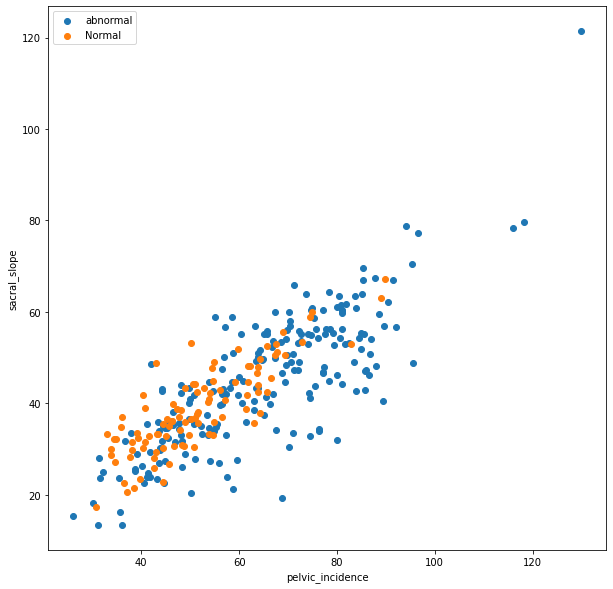

In [236]:

# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
f1,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(x=x,y=y,label='abnormal')
ax.set_xlabel('pelvic_incidence')
ax.set_ylabel('sacral_slope')


abnormal= data[data['class'] =='Normal']
abnormal_x = np.array(abnormal.loc[:,'pelvic_incidence']).reshape(-1,1)
abnormal_y = np.array(abnormal.loc[:,'sacral_slope']).reshape(-1,1)

ax.scatter(x=abnormal_x,y=abnormal_y,label='Normal')

ax.legend()
plt.show()

# now we can see abnormal data and normal data ,we apply lineer regression only on normal data 

R^2 score:  0.6458410481075871


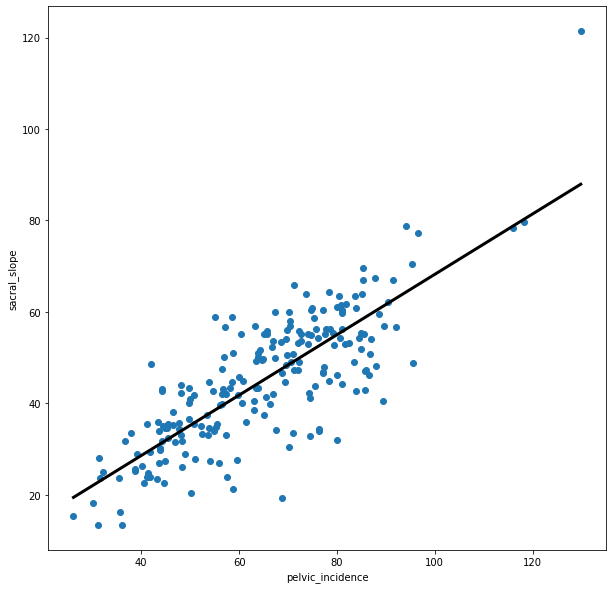

In [237]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter

plt.figure(figsize=(10,10))
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


In [238]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


In [239]:
# CV kfold cros-validation by shufling  
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score  

kfold=KFold(n_splits=5,shuffle=True)
cv_scores=[]

for train, test in kfold.split(x):

    x_train,y_train=x[train],y[train]
    x_test,y_test = x[test],y[test]
    
    rega=LinearRegression()
    rega.fit(x_train,y_train)
    pred=rega.predict(x_test)
    cv_scores.append(r2_score(y_test,pred))

print(cv_scores)
print(np.array(cv_scores).mean())

[0.6849717875224307, 0.4927589265041533, 0.6424676643329419, 0.7250384465662422, 0.6199542504635248]
0.6330382150778586


Regularized Regression

In [240]:
# Ridge regularization 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)

ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))


Ridge score:  0.5732611808361024


In [241]:
# Lasso regularization in multiple regression 
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1,)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)


Lasso score:  0.9999985469460118
Lasso coefficients:  [ 9.98901381e-01 -9.98137804e-01  3.13359061e-05 -0.00000000e+00]


In [242]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



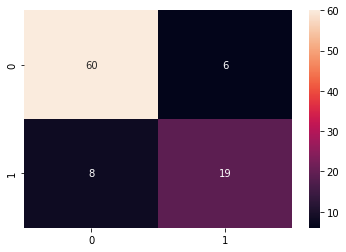

In [243]:
# visualize with seaborn library
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d") 
plt.show()